In [1]:
from fastai.vision.all import *

In [2]:
!unzip /content/drive/MyDrive/blurry_vs_not_blurry-20221027T065507Z-001.zip

Archive:  /content/drive/MyDrive/blurry_vs_not_blurry-20221027T065507Z-001.zip
  inflating: blurry_vs_not_blurry/notblurry/26_0_9165.jpg  
  inflating: blurry_vs_not_blurry/notblurry/28_0_6005.jpg  
  inflating: blurry_vs_not_blurry/notblurry/28_0_2167.jpg  
  inflating: blurry_vs_not_blurry/notblurry/31_0_4142.jpg  
  inflating: blurry_vs_not_blurry/notblurry/31_0_9522.jpg  
  inflating: blurry_vs_not_blurry/notblurry/30_0_2906.jpg  
  inflating: blurry_vs_not_blurry/notblurry/28_0_9096.jpg  
  inflating: blurry_vs_not_blurry/notblurry/29_0_1230.jpg  
  inflating: blurry_vs_not_blurry/notblurry/29_0_1951.jpg  
  inflating: blurry_vs_not_blurry/notblurry/31_0_7797.jpg  
  inflating: blurry_vs_not_blurry/notblurry/27_0_368.jpg  
  inflating: blurry_vs_not_blurry/notblurry/27_0_2963.jpg  
  inflating: blurry_vs_not_blurry/notblurry/30_0_272.jpg  
  inflating: blurry_vs_not_blurry/notblurry/30_0_1259.jpg  
  inflating: blurry_vs_not_blurry/notblurry/28_0_4878.jpg  
  inflating: blurry_vs_

In [3]:
path = Path("/content/blurry_vs_not_blurry")

In [5]:
files_blurry = get_image_files(path/"blurry")
files_notblurry = get_image_files(path/"notblurry")

In [6]:
image_df_blurry = pd.DataFrame(
    {
        "path":files_blurry,
        "label":True
    }
)

In [7]:
image_df_blurry.head()

,path,label
0,/content/blurry_vs_not_blurry/blurry/27.jpg,True
1,/content/blurry_vs_not_blurry/blurry/28_0_4942.jpg,True
2,/content/blurry_vs_not_blurry/blurry/15_0_4471.jpg,True
3,/content/blurry_vs_not_blurry/blurry/19_0_9222.jpg,True
4,/content/blurry_vs_not_blurry/blurry/4s_0_4338.jpg,True


In [8]:
image_df_notblurry = pd.DataFrame(
    {
        "path":files_notblurry,
        "label":False
    }
)

In [9]:
df_image = pd.concat([image_df_blurry, image_df_notblurry])
df_image

,path,label
0,/content/blurry_vs_not_blurry/blurry/27.jpg,True
1,/content/blurry_vs_not_blurry/blurry/28_0_4942.jpg,True
2,/content/blurry_vs_not_blurry/blurry/15_0_4471.jpg,True
3,/content/blurry_vs_not_blurry/blurry/19_0_9222.jpg,True
4,/content/blurry_vs_not_blurry/blurry/4s_0_4338.jpg,True
...,...,...
208,/content/blurry_vs_not_blurry/notblurry/16_0_3070.jpg,False
209,/content/blurry_vs_not_blurry/notblurry/26_0_3008.jpg,False
210,/content/blurry_vs_not_blurry/notblurry/16_0_7116.jpg,False
211,/content/blurry_vs_not_blurry/notblurry/15_0_6706.jpg,False


In [25]:
dls = ImageDataLoaders.from_df(df_image, path="/", item_tfms=Resize(224), valid_pct=0.20)

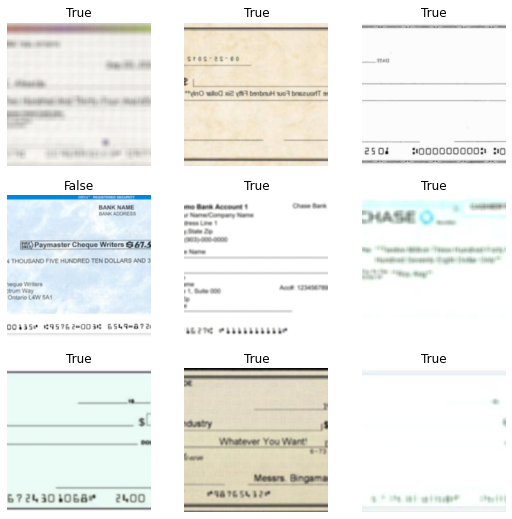

In [26]:
dls.show_batch()

In [27]:
learn = vision_learner(dls, resnet34, metrics=[error_rate, accuracy])

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [28]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.985519,2.121448,0.511905,0.488095,00:04


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.347660,0.195585,0.071429,0.928571,00:04


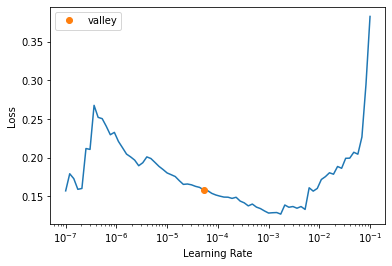

In [29]:
best_learning_rate = learn.lr_find()

In [30]:
learn.fine_tune(2, best_learning_rate[0])

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.189789,0.070167,0.035714,0.964286,00:04


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.166939,0.066695,0.023810,0.976190,00:04
1,0.140963,0.060718,0.023810,0.976190,00:04


In [31]:
classif_interp = ClassificationInterpretation.from_learner(learn)

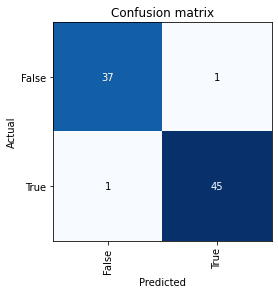

In [32]:
classif_interp.plot_confusion_matrix()

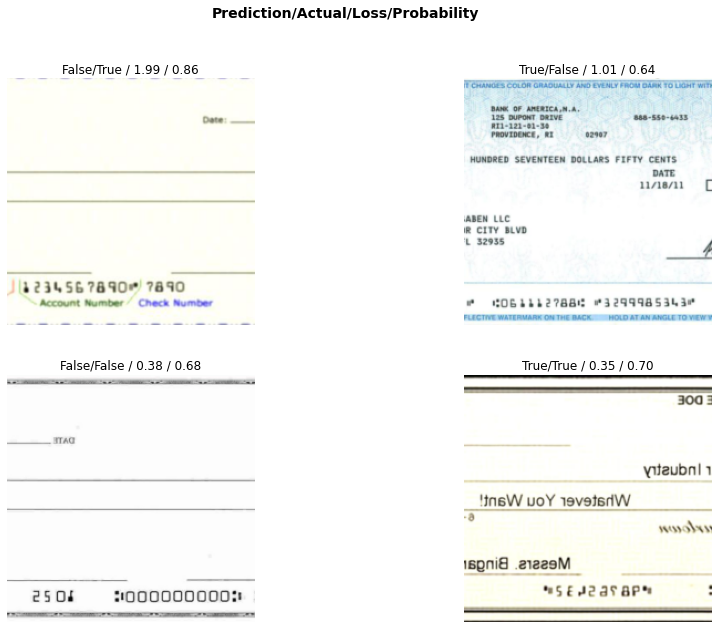

In [33]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(4, figsize=(15,10))